In [12]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [13]:
N = 200


X1 = np.random.randn(N//2, 2) 
X2 = np.random.randn(N//2, 2) + np.array([2, 0])
X = np.concatenate((X1, X2), axis=0)

rn = np.zeros((N, 2))

for i in range(N):
  nr = np.random.randint(0, 10)
  
  if(nr>=8):
    rn[i, 1] = 1
  else: 
    rn[i, 0] = 1

mus = X[np.random.permutation(N)[:2], :]

[[ 1.50761341 -1.24004071]
 [ 3.14255988  1.34371313]]


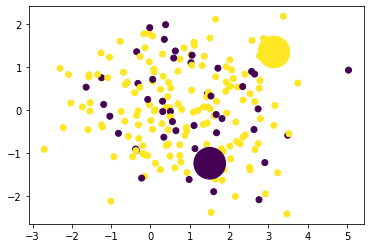

In [14]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=rn[:, 0])
plt.scatter(mus[:, 0], mus[:, 1], s=1000, c=mus[:, 1])


In [15]:
rn.shape

(200, 2)

In [16]:
mus

array([[ 1.50761341, -1.24004071],
       [ 3.14255988,  1.34371313]])

In [17]:

def J():
  value = 0
  for i in range(N):
    for k in range(2):
      value += rn[i, k] * np.sum((X[i, :] - mus[:, k])**2)
  return value



In [18]:

def expectation():
  # expectation
  for ix in range(200):
    initial_assignment = rn[ix, :]
    cost_before_switch = J()
    #print("Initial assignment: ", initial_assignment, "with cost", cost_before_switch )
    rn[ix, 0] = 1 - rn[ix, 0] 
    rn[ix, 1] = 1 - rn[ix, 1] 
    cost_after_switch = J()
    #print("After switching, we have cost", cost_after_switch )
    if(cost_after_switch > cost_before_switch):
      rn[ix, 0] = 1 - rn[ix, 0]
      rn[ix, 1] = 1- rn[ix, 1]
  #after_expectation_step = J()
  #print("Before:", before_expectation_step, "; after:", after_expectation_step)
  # maximization step



 

In [19]:
def maximization():
  mu_x = 0
  mu_y = 0
  for x in range(2) :
    mu_x = np.sum(np.multiply(rn[:, 0], X[:, x])) / np.sum(rn[:, 0])
    mus[x, 0] = mu_x
  for y in range(2) :
    mu_y = np.sum(np.multiply(rn[:, 1], X[:, y])) / np.sum(rn[:, 1])
    mus[y, 1] = mu_y  



In [20]:
mus

array([[ 1.50761341, -1.24004071],
       [ 3.14255988,  1.34371313]])

Before/after expectation: 1126.1923267300265 , 528.5398818605432
Before/after maximization: 528.5398818605432 , 480.0197388628569
Before/after expectation: 480.0197388628569 , 458.25040169683484
Before/after maximization: 458.25040169683484 , 426.3172701148252
Before/after expectation: 426.3172701148252 , 394.76770327522047
Before/after maximization: 394.76770327522047 , 365.7202755891501
Before/after expectation: 365.7202755891501 , 341.66826214666366
Before/after maximization: 341.66826214666366 , 322.37172204818734
Before/after expectation: 322.37172204818734 , 314.0126969583428
Before/after maximization: 314.0126969583428 , 311.73116896821284
Before/after expectation: 311.73116896821284 , 311.1100157576729
Before/after maximization: 311.1100157576729 , 310.9267168149206


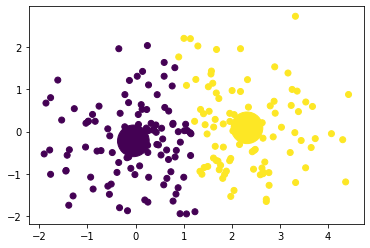

In [10]:
for iter in range(6):
  c1_before = J()
  expectation()
  c1_after = J()
  print("Before/after expectation:", c1_before, ",", c1_after)

  c2_before = J()
  maximization()
  c2_after = J()
  print("Before/after maximization:", c2_before, ",", c2_after)

mus = mus.T
# blue is first mu
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=rn[:, 0])
plt.scatter(mus[:, 0], mus[:, 1], s=1000, c=mus[:, 1])


In [11]:
mus

array([[ 2.31514694,  0.09093146],
       [-0.04468798, -0.21769735]])